In [43]:
from IPython.display import clear_output

"""
get kaggle dataset
"""
# !pip install -q kaggle
# !mkdir C:\Users\Roykesydone\.kaggle
# !copy kaggle.json C:\Users\Roykesydone\.kaggle.
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list
!kaggle competitions download -c bike-sharing-demand
clear_output()

In [44]:
!unzip -o ./bike-sharing-demand.zip
clear_output()

In [45]:
!tar -xf bike-sharing-demand.zip

tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


In [46]:
"""
get train/valid dataset
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime


df = pd.read_csv("train.csv")
df.info()
print(df.head(1))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13 

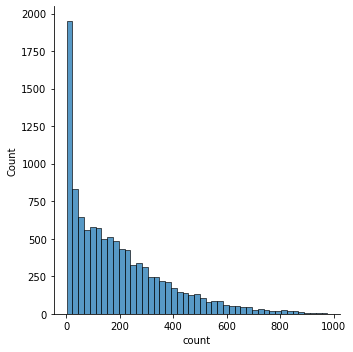

In [47]:
sns.displot(df['count'])

<AxesSubplot:>

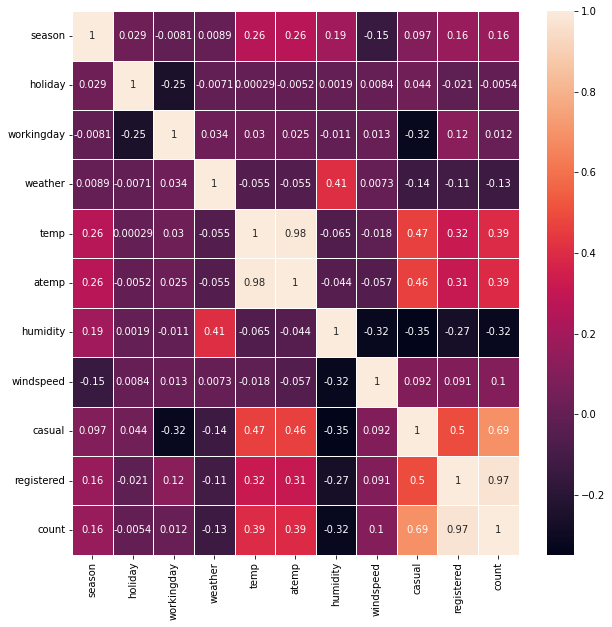

In [48]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(), annot=True, linewidths=1, ax=ax)

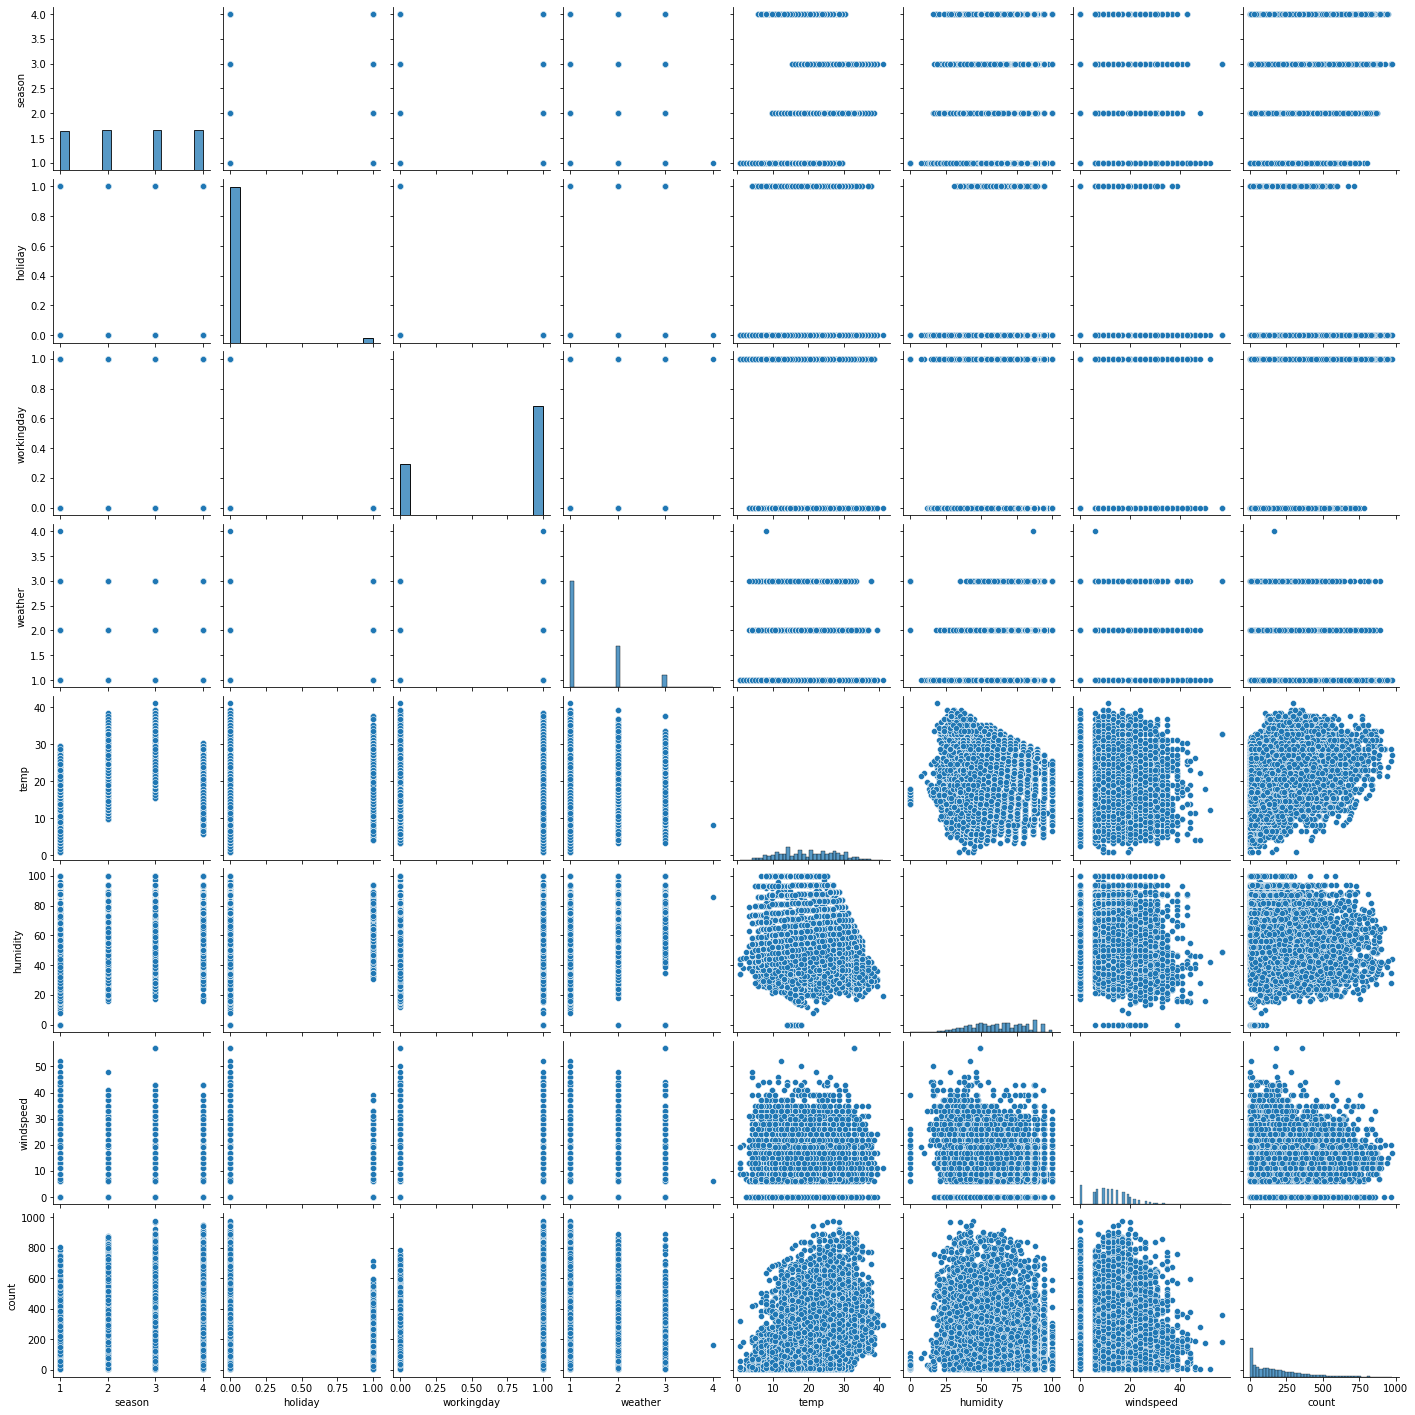

In [49]:
sns.pairplot(df[['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity', 'windspeed','count']])

In [50]:
def divide_datetime_(df):
    df['year'] = df.datetime.apply(lambda x: x.split('-')[0])
    df['month'] = df.datetime.apply(lambda x: calendar.month_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").month])
    df['day'] = df.datetime.apply(lambda x: x.split(' ')[0])
    df['hour'] = df.datetime.apply(lambda x: int(x.split(' ')[1][:2]))
    df['weekday'] = df.datetime.apply(lambda x: calendar.day_name[datetime.strptime(x.split(' ')[0], "%Y-%m-%d").weekday()])

divide_datetime_(df)
    
print(df.columns)
print(df.head(1))

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year    month         day  \
0        81        0.0       3          13     16  2011  January  2011-01-01   

   hour   weekday  
0     0  Saturday  


<AxesSubplot:xlabel='day'>

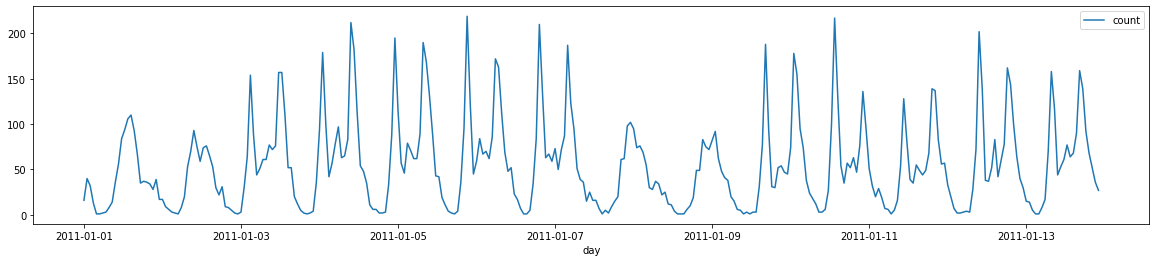

In [51]:
df[df['day'].isin(df['day'].unique()[0:14])].plot(x='day', y='count', figsize=(20, 4))

<Figure size 432x288 with 0 Axes>

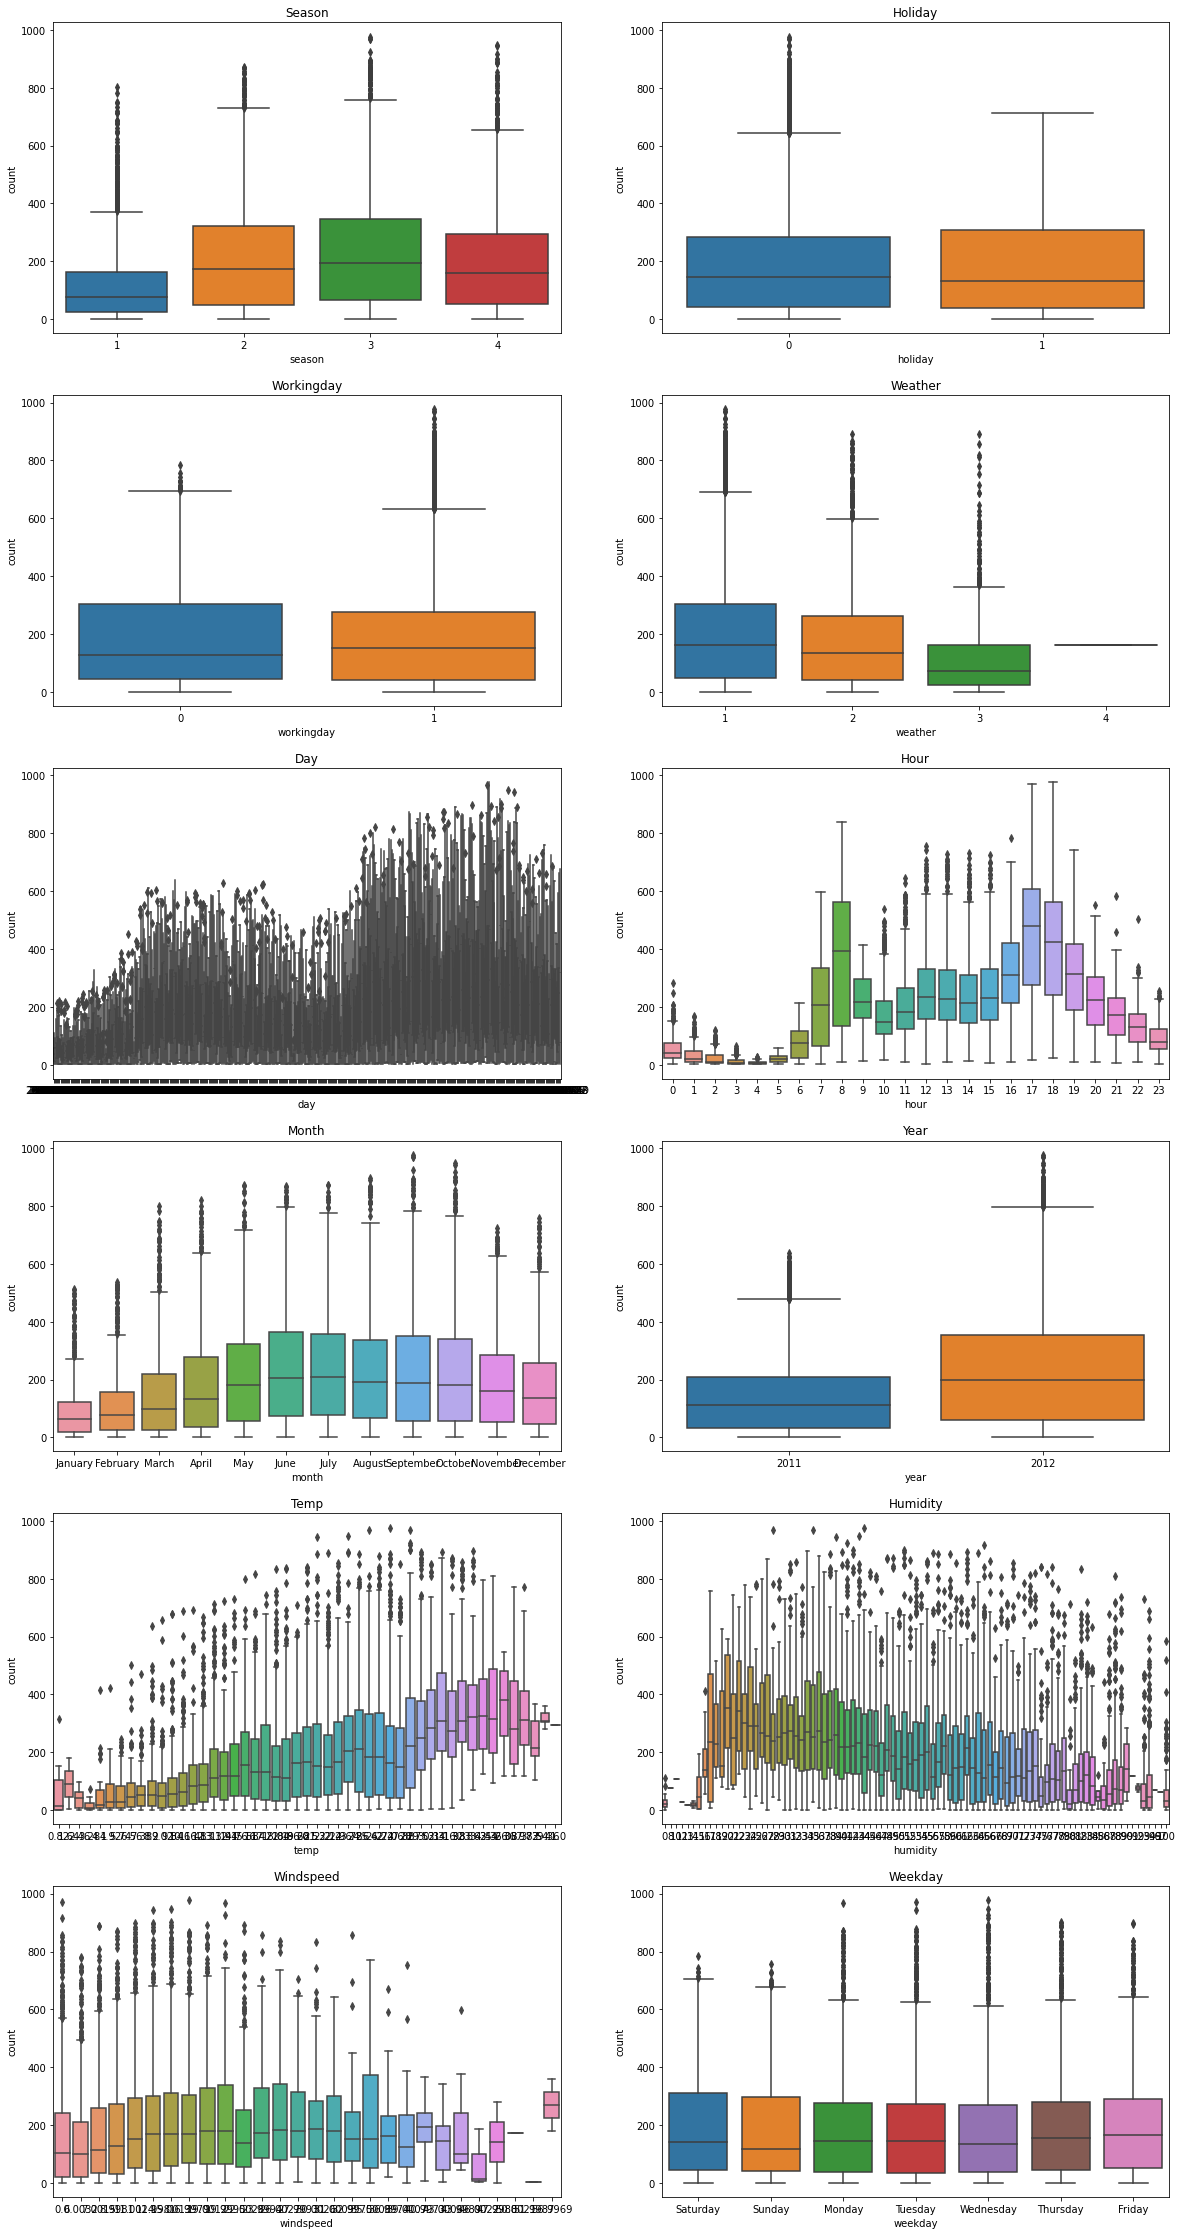

In [52]:
plt.figure()
f, ax = plt.subplots(nrows=6, ncols=2 , figsize=(20,40))

sns.boxplot(data=df, y='count', x='season', ax=ax[0][0]).set(title='Season')
sns.boxplot(data=df, y='count', x='holiday', ax=ax[0][1]).set(title='Holiday')
sns.boxplot(data=df, y='count', x='workingday', ax=ax[1][0]).set(title='Workingday')
sns.boxplot(data=df, y='count', x='weather', ax=ax[1][1]).set(title='Weather')
sns.boxplot(data=df, y='count', x='day', ax=ax[2][0]).set(title='Day')
sns.boxplot(data=df, y='count', x='hour', ax=ax[2][1]).set(title='Hour')
sns.boxplot(data=df, y='count', x='month', ax=ax[3][0]).set(title='Month')
sns.boxplot(data=df, y='count', x='year', ax=ax[3][1]).set(title='Year')
sns.boxplot(data=df, y='count', x='temp', ax=ax[4][0]).set(title='Temp')
sns.boxplot(data=df, y='count', x='humidity', ax=ax[4][1]).set(title='Humidity')
sns.boxplot(data=df, y='count', x='windspeed', ax=ax[5][0]).set(title='Windspeed')
sns.boxplot(data=df, y='count', x='weekday', ax=ax[5][1]).set(title='Weekday')

plt.show()

season     1.000000
count     28.292035
dtype: float64


<AxesSubplot:xlabel='hour'>

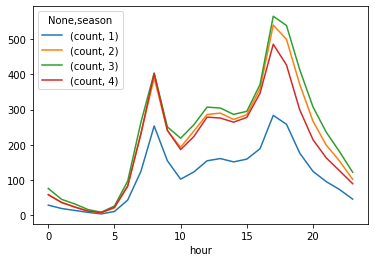

In [53]:

print(df[(df['hour']==0) & (df['season']==1)][['season','count']].mean()) 
df.pivot_table(index=['hour'], columns=['season'], values=['count']).plot()

In [54]:
print(df.columns)
print(df.head(3))

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  year    month         day  \
0        81        0.0       3          13     16  2011  January  2011-01-01   
1        80        0.0       8          32     40  2011  January  2011-01-01   
2        80        0.0       5          27     32  2011  January  2011-01-01   

   hour   weekday  
0     0  Saturday  
1     1  Saturday  
2     2  Saturday  


In [486]:
df_col_filtered = df.drop(['datetime', 'atemp', 'casual', 'registered'], axis=1)
print(df_col_filtered.columns)
print(df_col_filtered.head(2))

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'humidity',
       'windspeed', 'count', 'year', 'month', 'day', 'hour', 'weekday'],
      dtype='object')
   season  holiday  workingday  weather  temp  humidity  windspeed  count  \
0       1        0           0        1  9.84        81        0.0     16   
1       1        0           0        1  9.02        80        0.0     40   

   year    month         day  hour   weekday  
0  2011  January  2011-01-01     0  Saturday  
1  2011  January  2011-01-01     1  Saturday  


In [487]:
def z_score_standard_(df, cols, train_flag, mean_dict, std_dict):
    
    for col in cols:
        if col in df.columns:
            if train_flag:
                mean_dict[col] = df[col].mean()
                std_dict[col] = df[col].std()
            df['z_score_' + col] = (df[col] - mean_dict[col])/ std_dict[col]
    
    return mean_dict, std_dict

In [488]:
z_score_column = ['temp', 'humidity']

mean_dict = {}
std_dict = {}
z_score_standard_(df_col_filtered, z_score_column, True, mean_dict, std_dict)

for col in z_score_column:
    if col in df_col_filtered.columns:
        df_col_filtered = df_col_filtered.drop([col], axis=1)

print(df_col_filtered.columns)
print(df_col_filtered.head(2))

Index(['season', 'holiday', 'workingday', 'weather', 'windspeed', 'count',
       'year', 'month', 'day', 'hour', 'weekday', 'z_score_temp',
       'z_score_humidity'],
      dtype='object')
   season  holiday  workingday  weather  windspeed  count  year    month  \
0       1        0           0        1        0.0     16  2011  January   
1       1        0           0        1        0.0     40  2011  January   

          day  hour   weekday  z_score_temp  z_score_humidity  
0  2011-01-01     0  Saturday     -1.333599          0.993167  
1  2011-01-01     1  Saturday     -1.438841          0.941206  


In [489]:
from category_encoders.target_encoder import TargetEncoder

"""
one-hot encoding
"""


def one_hot_encoding(inputs, one_hot_cols):
    NEW_COLUMNS = [
        "z_score_temp",
        "z_score_humidity",
        "season",
        "year",
        "weather",
        "hour",
        "workingday",
        "weekday"
    ]

    for col in one_hot_cols:
        if col in inputs.columns:
            inputs = inputs.join(pd.get_dummies(inputs[col], prefix=col))
            inputs = inputs.drop([col], axis=1)
    inputs = pd.DataFrame(inputs, columns=NEW_COLUMNS)
    inputs = inputs.fillna(0)

    return inputs


def target_encoding(inputs, labels, categorical_cols, fold):
    encoded_inputs = pd.DataFrame()
    total_count = inputs.shape[0]

    for k in range(fold):
        last = int(total_count * ((k + 1) / fold))
        prev = int(total_count * ((k) / fold))

        train_target_input = pd.concat([inputs.iloc[:prev, :], inputs.iloc[last:, :]])
        train_target_label = pd.concat([labels.iloc[:prev], labels.iloc[last:]])

        set_target_input = inputs.iloc[prev:last, :]
        set_target_label = labels[prev:last]

        target_encoder = TargetEncoder(
            cols=categorical_cols,
            handle_unknown="value",
            handle_missing="value",
        ).fit(train_target_input, train_target_label)

        if prev != 0:
            encoded_inputs = pd.concat(
                [encoded_inputs, target_encoder.transform(set_target_input)]
            )
        elif prev == 0:
            encoded_inputs = target_encoder.transform(set_target_input)

    return encoded_inputs


In [490]:
train = df_col_filtered.sample(frac=0.7,random_state=325).drop(labels=['day'],axis=1)
valid = df_col_filtered.drop(train.index).drop(labels=['day'],axis=1)

train_x = train.drop(labels=['count'],axis=1)
train_y = train['count']
valid_x = valid.drop(labels=['count'],axis=1)
valid_y = valid['count']


print(f'total: {df_col_filtered.shape[0]}, train: {train.shape[0]}, valid: {valid.shape[0]}')

print(train_x.columns)
print(train_x.head(3))

total: 10886, train: 7620, valid: 3266
Index(['season', 'holiday', 'workingday', 'weather', 'windspeed', 'year',
       'month', 'hour', 'weekday', 'z_score_temp', 'z_score_humidity'],
      dtype='object')
      season  holiday  workingday  weather  windspeed  year     month  hour  \
7743       2        0           0        1    11.0014  2012      June     0   
7393       2        0           1        2    12.9980  2012       May    10   
665        1        0           1        1     7.0015  2011  February    23   

       weekday  z_score_temp  z_score_humidity  
7743    Sunday      0.245026         -0.098023  
7393    Monday      0.139784          0.785322  
665   Thursday     -1.965050         -1.033329  


In [491]:
one_hot_cols = []
target_encoding_cols = ["hour", "weather", "season", "year", "weekday"]

target_encoder = TargetEncoder(
    cols=target_encoding_cols,
    handle_unknown="value",
    handle_missing="value",
).fit(train_x, train_y)


train_x = target_encoding(train_x, train_y, target_encoding_cols, 10)
train_x = one_hot_encoding(train_x, one_hot_cols)

valid_x = target_encoder.transform(valid_x)
valid_x = one_hot_encoding(valid_x, one_hot_cols)
clear_output()


In [492]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_log_error

from typing import Tuple
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


def neg_rmsle(y, y_pred):
    return np.sqrt(mean_squared_log_error(y, y_pred)) * -1


neg_rmsle_scorer = make_scorer(neg_rmsle, greater_is_better=True)

print(train_x.shape, train_y.shape)
xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.025)
# lgbm_model = LGBMRegressor(n_estimators=100, learning_rate=0.03)
print(
    f"rmsle XGBoost K-fold: {cross_val_score(xgboost_model, train_x, train_y, cv=10, scoring=neg_rmsle_scorer).mean()}"
)
# print(
#     f"rmsle LGBM K-fold: {cross_val_score(lgbm_model, train_x, train_y, cv=10, scoring=neg_rmsle_scorer).mean()}"
# )
xgboost_model = XGBRegressor()
# lgbm_model = LGBMRegressor()
# 這邊不知道為什麼 n_estimators 和 learning rate 沒調好的話，他會說 target 有負數
xgboost = xgboost_model.fit(train_x, train_y)

(7620, 8) (7620,)
rmsle XGBoost K-fold: -0.4522827602688187


In [493]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
print(torch.__version__)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

1.8.1
cuda:0


In [494]:
class NN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 1),
        )

    def forward(self, input):
        out = self.fc(input)
        return out

In [495]:
class RMSLELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, pred, actual):
        return torch.sqrt(
            self.mse(
                torch.log(torch.clip(pred + 1, min=1e-5, max=None)),
                torch.log(torch.clip(actual + 1, min=1e-5, max=None)),
            )
        )


In [496]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()

    def forward(self, yhat, y):
        return torch.sqrt(self.mse(yhat, y))


In [497]:
"""
hyperparameters
"""
epochs = 1000
learning_rate = 0.001
batch_size = 128


input_dims = train_x.shape[1]
model = NN(input_dims).to(device)
print(model)
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
# criterion = nn.MSELoss()
criterion = RMSLELoss()
# criterion = RMSELoss()


NN(
  (fc): Sequential(
    (0): Linear(in_features=8, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=32, bias=True)
    (5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [498]:

train_inputs = torch.tensor(train_x.values.tolist(), dtype=torch.float).to(device)
train_labels = torch.tensor(train_y.values.tolist(), dtype=torch.float).to(device)
train_labels = torch.sqrt(train_labels)

valid_inputs = torch.tensor(valid_x.values.tolist(), dtype=torch.float).to(device)
valid_labels = torch.tensor(valid_y.values.tolist(), dtype=torch.float).to(device)

train_dataset = TensorDataset(train_inputs, train_labels)
trainLoader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0, drop_last=True)


best_loss = 1000000000
best_accuracy = 0 
best_epoch = -1
last_update_cnt = 0

for epoch_index, epoch in enumerate(range(epochs), 0):
    model.train()
    batch_loss = []
    for i, batch in enumerate(trainLoader, 0):
        inputs, labels = batch
        
        optimizer.zero_grad() 
        outputs = model(inputs) 
        loss = criterion(outputs, labels.unsqueeze(dim=1))
        batch_loss.append(loss.cpu().data.numpy())
        loss.backward() 
        optimizer.step() 

    
    if  epoch_index % 1 == 0:
        model.eval()
        with torch.no_grad():
            outputs = model(valid_inputs)
            loss = criterion(torch.pow(outputs, 2), valid_labels.unsqueeze(dim=1))
            loss = np.mean(loss.cpu().data.numpy())
            last_update_cnt += 1
            if loss < best_loss:
                best_epoch = epoch_index
                best_loss = loss
                last_update_cnt = 0
                torch.save(model.state_dict(), "model.pk1") 

        if last_update_cnt >= 50:
            print('might aleready become convergence or overfitting')
            break

        if epoch_index % 100 == 0:
            print("epoches: ", epoch_index, "loss: ", np.mean(batch_loss))
            print("valid - epoches: ", epoch_index, "loss: ", loss)


print('best loss in valid: ', best_loss)
print(f"best epoch:{best_epoch}")

epoches:  0 loss:  3.2610247
valid - epoches:  0 loss:  4.7564707
epoches:  100 loss:  0.3332422
valid - epoches:  100 loss:  0.59088594
might aleready become convergence or overfitting
best loss in valid:  0.540908
best epoch:139


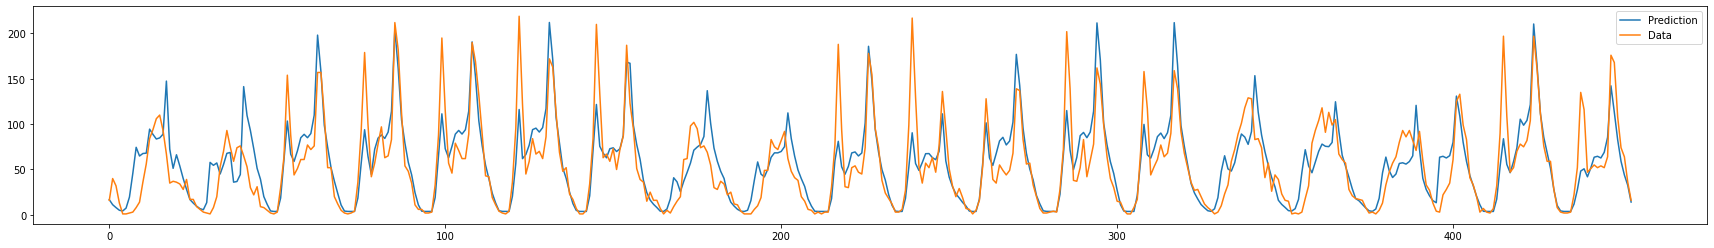

In [499]:
model.load_state_dict(torch.load("model.pk1")) 
model.eval()


test_df = df_col_filtered[df_col_filtered['day'].isin(df_col_filtered['day'].unique()[:20])]

test_x = test_df.drop(labels=['count', 'day'],axis=1)
test_x = target_encoder.transform(test_x)
test_x = one_hot_encoding(test_x, one_hot_cols)


plot_pred = torch.pow(model(torch.tensor(test_x.values.tolist(), dtype=torch.float).to(device)), 2)


fig, ax = plt.subplots(figsize=(30,4))
test_df = test_df['count'].reset_index()

ax.plot(plot_pred.cpu().detach().numpy(), label='Prediction')

ax.plot(test_df['count'], label='Data')
ax.legend()

In [500]:
# 用全部資料重 train 一次
# model = NN(input_dims).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
# criterion = RMSLELoss()
# epochs = best_epoch

# all_inputs = torch.cat((train_inputs, valid_inputs), 0)
# all_labels = torch.cat((train_labels, valid_labels), 0)

# all_dataset = TensorDataset(all_inputs, all_labels)
# trainLoader = DataLoader(
#     all_dataset, batch_size=batch_size, shuffle=True, num_workers=0
# )

# for epoch_index, epoch in enumerate(range(epochs), 0):
#     model.train()
#     for i, batch in enumerate(trainLoader, 0):
#         inputs, labels = batch

#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels.unsqueeze(dim=1))
#         loss.backward()
#         optimizer.step()


In [501]:

data = pd.read_csv("train.csv")
divide_datetime_(data)
z_score_standard_(data, z_score_column, False, mean_dict, std_dict)
data = data.drop(labels=["day", "datetime", "atemp", "humidity", "temp",  'casual', 'registered'], axis=1)
data_x = data.drop(labels=['count'],axis=1)
data_y = data['count']


target_encoder = TargetEncoder(
    cols=target_encoding_cols,
    handle_unknown="value",
    handle_missing="value",
).fit(data_x, data_y)
clear_output()

In [502]:
data = pd.read_csv("test.csv")

print(data_x.columns)

divide_datetime_(data)
z_score_standard_(data, z_score_column, False, mean_dict, std_dict)


data = data.drop(labels=["day", "datetime", "atemp", "humidity", "temp"], axis=1)
data = target_encoder.transform(data)
data = one_hot_encoding(data, one_hot_cols)

print(data.columns)
print(data.head(3))

"""
NN
"""
data_tensor = torch.tensor(data.values.tolist(), dtype=torch.float).to(device)

# 這是讀訓練過程中的 model，目前不知道為什麼用全部資料 train 會爛掉
# 要找一下 BUG
model.load_state_dict(torch.load("model.pk1"))

model.eval()
with torch.no_grad():
    outputs = torch.pow(model(data_tensor), 2)
    outputs = torch.clip(outputs, min=0, max=None)

submission = pd.read_csv("./sampleSubmission.csv")
submission["count"] = outputs.cpu()
submission.to_csv("./sampleSubmission.csv", index=False)

"""
xgboost
"""
# outputs = xgboost_model.predict(data)

# submission = pd.read_csv("./sampleSubmission.csv")
# submission["count"] = outputs.clip(0, 10000)
# submission.to_csv("./sampleSubmission.csv", index=False)



Index(['season', 'holiday', 'workingday', 'weather', 'windspeed', 'year',
       'month', 'hour', 'weekday', 'z_score_temp', 'z_score_humidity'],
      dtype='object')
Index(['z_score_temp', 'z_score_humidity', 'season', 'year', 'weather', 'hour',
       'workingday', 'weekday'],
      dtype='object')
   z_score_temp  z_score_humidity      season        year     weather  \
0     -1.228358         -0.305869  116.343261  144.223349  205.236791   
1     -1.228358         -0.305869  116.343261  144.223349  205.236791   
2     -1.228358         -0.305869  116.343261  144.223349  205.236791   

        hour  workingday     weekday  
0  55.138462           1  197.296201  
1  33.859031           1  197.296201  
2  22.899554           1  197.296201  


'\nxgboost\n'

NN:

![](https://i.imgur.com/LAEcnYA.png)

依然不是很理想(2119/3242 左右)，但至少沒之前離譜

有空再改

XGBoost:

![](https://i.imgur.com/O2Tezj8.png)